# Artificial Neural Networks for Regression

_By: Ling Li Ya, Liana_

## Pre-training Preparation

### Installing Dependencies

In [1]:
!pip install tensorflow
!pip install keras

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

2021-11-26 10:57:00.731125: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-26 10:57:00.731221: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Loading Data

In [3]:
# Cleaned dataset with no outliers
X_train_no = pd.read_csv('../dataset/no_outliers/X_train.csv')
X_test_no = pd.read_csv('../dataset/no_outliers/X_test.csv')
y_train_no = pd.read_csv('../dataset/no_outliers/y_train.csv')
y_test_no = pd.read_csv('../dataset/no_outliers/y_test.csv')

# Uncleaned original data
X_train_with = pd.read_csv('../dataset/with_outliers/X_train.csv')
X_test_with = pd.read_csv('../dataset/with_outliers/X_test.csv')
y_train_with = pd.read_csv('../dataset/with_outliers/y_train.csv')
y_test_with = pd.read_csv('../dataset/with_outliers/y_test.csv')

In [4]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Scale data to standardise data values
X_train_no_trans = X_scaler.fit_transform(X_train_no)
X_test_no_trans = X_scaler.transform(X_test_no)
y_train_no_trans = y_scaler.fit_transform(y_train_no)
y_test_no_trans = y_scaler.transform(y_test_no)

In [5]:
print(X_train_no.shape, y_train_no.shape, X_test_no.shape, y_test_no.shape)

(578, 9) (578, 1) (145, 9) (145, 1)


## Training

Using a layer with 5 neurons, with 9 input dimensions of normal weight, using relu activation function. Batch size is 20 and training epochs are 50.

In [6]:
model = Sequential()

# Defining the input layer and first hidden layer
model.add(Dense(units=5, input_dim=9, kernel_initializer='normal', activation='relu'))

# Defining the second layer of the model
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node as only a single number is predicted
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the training data
model.fit(X_train_no_trans, y_train_no_trans, batch_size=20, epochs=50, verbose=1)

2021-11-26 10:57:04.788935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-26 10:57:04.789294: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-26 10:57:04.789369: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Liana-ASUS): /proc/driver/nvidia/version does not exist
2021-11-26 10:57:04.789922: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
29/29 [==============================] - 1s 1ms/step - loss: 0.9991
Epoch 2/50
29/29 [==============================] - 0s 3ms/step - loss: 0.9921
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 0.9657
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 0.8941
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 0.7440
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5342
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 0.3627
Epoch 8/50
29/29 [==============================] - 0s 3ms/step - loss: 0.2712
Epoch 9/50
29/29 [==============================] - 0s 3ms/step - loss: 0.2349
Epoch 10/50
29/29 [==============================] - 0s 3ms/step - loss: 0.2182
Epoch 11/50
29/29 [==============================] - 0s 4ms/step - loss: 0.2073
Epoch 12/50
29/29 [==============================] - 0s 3ms/step - loss: 0.1999
Epoch 13/50
29/29 [==============================

## Hyperparameter Tuning

To find the best accuracy with the minimum number of layers/neurons.

### Grid Search

MAPE is used. MAPE is Mean Absolute Percent Error. This is defined as the Average Absolute Error divided by the Average of the Actual Quantity. A more elegant way to compute this would be to divide the Sum of the Absolute Error by the Sum of the Actual Quantity.

MAPE = (Sum of Abs. Error) / (Sum of Actuals)

In [7]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]

    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    trial_number=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            trial_number += 1
            # create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # Output neuron
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(trial_number, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100 - MAPE)
            
            SearchResultsData = SearchResultsData.append(pd.DataFrame(data=[[trial_number, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]], columns=['TrialNumber', 'Parameters', 'Accuracy'] ))

    return(SearchResultsData)

ResultsData = FunctionFindBestParams(X_train_no_trans, y_train_no_trans, X_test_no_trans, y_test_no_trans)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 124.5544539416173
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 67.39128969586481
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 104.93810729158642
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 96.71883433814449
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 141.76674932375877
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 136.5755909357189
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 93.25235811674115
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 114.21633848668621
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 116.9933466651714
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 128.78529545590393
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 85.33430210769947
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 86.30911755221044
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 113.94435701439122
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 123.11427852897057
15 Parameters:

### Plotting Results

In [8]:
# Taking only numerical data from the series for graph plotting
# ResultsData['Accuracy'] = [x for a in range(ResultsData.shape[0]) for x in ResultsData['Accuracy_Series'].values[a]]
# ResultsData = ResultsData.drop(labels=['Accuracy_Series'], axis=1)
# ResultsData

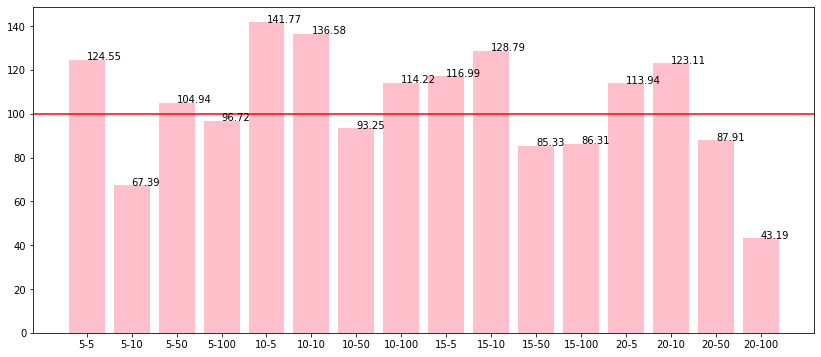

In [9]:
# ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')


# plt.show()

plt.figure(figsize=(14,6))
plt.bar(ResultsData['Parameters'], height=ResultsData['Accuracy'], color='pink')
plt.axhline(y=100, color='r', linestyle='-')
for a, b in zip([x for x in range(len(ResultsData['Accuracy']))], round(ResultsData['Accuracy'], 2)):
    plt.text(a, b, str(b), color='black')

From the graph above, it can be known that the best hyperparameters are batch_size = 20 and epochs = 10.

In [10]:
# Fine-tine hyperparameters
model.fit(X_train_no_trans, y_train_no_trans, batch_size = 20, epochs = 10, verbose = 0)

pred = model.predict(X_test_no_trans)

# target_scaler = MinMaxScaler()

# Scale predictions
pred = y_scaler.inverse_transform(pred)

# Scale back to original
y_test_no_ori = y_scaler.inverse_transform(y_test_no_trans)
X_test_no_ori = X_scaler.inverse_transform(X_test_no_trans)

test_data = pd.DataFrame(data=X_test_no_ori, columns=X_test_no.columns)
test_data['count'] = y_test_no_ori
test_data['pred_count'] = pred
test_data.head()

,season,year,month,holiday,weekday,weather,temperature,humidity,windspeed,count,pred_count
0,3.0,1.0,7.0,0.0,0.0,1.0,0.721667,0.623750,0.170396,6597.0,6862.355469
1,2.0,1.0,5.0,0.0,4.0,1.0,0.593333,0.520000,0.229475,7384.0,6994.055664
2,3.0,1.0,8.0,0.0,5.0,2.0,0.765833,0.642500,0.215792,7175.0,6963.418945
3,2.0,1.0,4.0,0.0,5.0,1.0,0.403333,0.377083,0.300388,6460.0,5676.679688
4,4.0,1.0,11.0,0.0,1.0,1.0,0.319167,0.494167,0.236325,5259.0,5089.444336


In [11]:
# Mean Absolute Percentage Error
APE = 100 * (abs(test_data['count'] - test_data['pred_count']) / test_data['count'])
test_data['APE'] = APE

print("Accuracy: ", 100 - np.mean(APE))
test_data.head()

Accuracy:  83.15733059998615


,season,year,month,holiday,weekday,weather,temperature,humidity,windspeed,count,pred_count,APE
0,3.0,1.0,7.0,0.0,0.0,1.0,0.721667,0.623750,0.170396,6597.0,6862.355469,4.022366
1,2.0,1.0,5.0,0.0,4.0,1.0,0.593333,0.520000,0.229475,7384.0,6994.055664,5.280936
2,3.0,1.0,8.0,0.0,5.0,2.0,0.765833,0.642500,0.215792,7175.0,6963.418945,2.948865
3,2.0,1.0,4.0,0.0,5.0,1.0,0.403333,0.377083,0.300388,6460.0,5676.679688,12.125701
4,4.0,1.0,11.0,0.0,1.0,1.0,0.319167,0.494167,0.236325,5259.0,5089.444336,3.224105


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 50        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________
